In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Prs/Datasets/matches.csv')

In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df['city'].value_counts()[:7]

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Chennai       57
Jaipur        47
Name: city, dtype: int64

In [7]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Summarizing interesting facts from the data :**

In [8]:
print('Total number of Teams :',df['team1'].nunique())
print('Total number of Seasons :',df['Season'].nunique())
print('Total number of Venues :',df['venue'].nunique())
print('Total number of Cities :',df['city'].nunique())

Total number of Teams : 15
Total number of Seasons : 12
Total number of Venues : 41
Total number of Cities : 32


In [9]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [10]:
df['city'] = df['city'].replace('Bangalore' , 'Bengaluru')

In [11]:
# Lets find the top 6 cities where maximum matches are played :

print('Top 6 cities where maximun number of matches are played :\n',df['city'].value_counts()[:6])

Top 6 cities where maximun number of matches are played :
 Mumbai       101
Bengaluru     80
Kolkata       77
Delhi         74
Hyderabad     64
Chennai       57
Name: city, dtype: int64


In [12]:
# Lets check all the umpires who have umpired :
ump_1 = set(df['umpire1'].unique())
ump_2 = set(df['umpire2'].unique())
ump_3 = set(df['umpire3'].unique())

ump = ump_1.intersection(ump_2)
ump = ump.intersection(ump_3)

print('The number of umpires :',len(ump))
print('Names of umpires :',ump)

The number of umpires : 20
Names of umpires : {nan, 'KN Ananthapadmanabhan', 'Nitin Menon', 'S Ravi', 'A Nanda Kishore', 'Nigel Llong', 'Chris Gaffaney', 'Bruce Oxenford', 'Nanda Kishore', 'Vineet Kulkarni', 'O Nandan', 'Rod Tucker', 'C Shamshuddin', 'K Ananthapadmanabhan', 'Anil Chaudhary', 'Kumar Dharmasena', 'Yeshwant Barde', 'Ian Gould', 'Anil Dandekar', 'Ulhas Gandhe'}


In [13]:
# Lets find out the matches in which there were no umpires at all :

df[(df['umpire1'].isnull()) &
   (df['umpire2'].isnull()) &
   (df['umpire3'].isnull())][['date','team1','team2','winner','umpire1','umpire2','umpire3']]

,date,team1,team2,winner,umpire1,umpire2,umpire3
4,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,NaN,NaN,NaN
753,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,NaN,NaN,NaN


In [14]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Exploring the best players from IPL :**

In [15]:
print('Number of Players who have won the player of the match award :',df['player_of_match'].nunique())

# Lets check the top 10 players winning max. player of the match award :
df['player_of_match'].value_counts()[:10]

Number of Players who have won the player of the match award : 226


CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [16]:
# Checking the matches where Chris Gayle won the title of “player of the match” :

gayle_playerofmatch = df[df['player_of_match'] == 'CH Gayle'].reset_index(drop = True)
gayle_playerofmatch

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,20,IPL-2017,Rajkot,18-04-2017,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma,NaN
1,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
2,258,IPL-2011,Kolkata,22-04-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
3,280,IPL-2011,Bengaluru,06-05-2011,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin,NaN
4,283,IPL-2011,Bengaluru,08-05-2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,SS Hazare,NaN
5,291,IPL-2011,Bengaluru,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
6,302,IPL-2011,Bengaluru,22-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen,NaN
7,306,IPL-2011,Chennai,27-05-2011,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,43,0,CH Gayle,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
8,329,IPL-2012,Bengaluru,17-04-2012,Pune Warriors,Royal Challengers Bangalore,Pune Warriors,bat,normal,0,Royal Challengers Bangalore,0,6,CH Gayle,M Chinnaswamy Stadium,S Asnani,S Das,NaN
9,333,IPL-2012,Chandigarh,20-04-2012,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,5,CH Gayle,"Punjab Cricket Association Stadium, Mohali",S Ravi,RJ Tucker,NaN




1. Chris Gayle used to play for Royal Challengers Bangalore before 2018 and after 2018, Chris Gayle was bought by Kings XI Punjab in the IPL Auction.
2. After 2018, Kings XI Punjab has won the matches where Chris Gayle has shown his excellent performance.  



**Discovering the Biggest Matches in IPL :**

In [17]:
df[['win_by_runs','win_by_wickets']].describe()

,win_by_runs,win_by_wickets
count,756.000000,756.000000
mean,13.283069,3.350529
std,23.471144,3.387963
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,19.000000,6.000000
max,146.000000,10.000000


In [18]:
# Lets check the biggest win of margin 146 runs :

df[df['win_by_runs'] == 146][['Season','team1','team2','winner','umpire1','umpire2','umpire3']]

,Season,team1,team2,winner,umpire1,umpire2,umpire3
43,IPL-2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,Nitin Menon,CK Nandan,NaN


**“Mumbai Indians” who has won against “Delhi Daredevils” in IPL-2017 by 146 runs.**

In [19]:
# Lets check the check the teams winning by 10 wickets :

df[df['win_by_wickets'] == 10][['Season','team1','team2','winner','win_by_wickets','umpire1','umpire2','umpire3']].reset_index(drop = True)

,Season,team1,team2,winner,win_by_wickets,umpire1,umpire2,umpire3
0,IPL-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10,Nitin Menon,CK Nandan,NaN
1,IPL-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,10,YC Barde,CK Nandan,NaN
2,IPL-2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,10,Asad Rauf,SL Shastri,NaN
3,IPL-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,10,MR Benson,SD Ranade,NaN
4,IPL-2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,10,K Hariharan,DJ Harper,NaN
5,IPL-2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10,RE Koertzen,PR Reiffel,NaN
6,IPL-2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10,HDPK Dharmasena,C Shamshuddin,NaN
7,IPL-2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,10,Aleem Dar,C Shamshuddin,NaN
8,IPL-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,10,M Erasmus,S Ravi,NaN
9,IPL-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10,K Bharatan,HDPK Dharmasena,NaN




*   There are 11 teams who won against their competitors by 10 wickets.
*   Royal Challengers Bangalore did this commendable job not only once but thrice which is quite good



In [20]:
# Top 10 victory moments for RCB :

win_by_runs = df[(df['winner'] == 'Royal Challengers Bangalore') & (df['win_by_runs'] > 100)] 
win_by_wickets = df[(df['winner'] == 'Royal Challengers Bangalore') & (df['win_by_wickets'] > 7)]
win_by_runs = win_by_runs.append(win_by_wickets)

rcb_greatest_victory = win_by_runs.reset_index()[:10]
rcb_greatest_victory

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,410,411,IPL-2013,Bengaluru,23-04-2013,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
1,556,557,IPL-2015,Bengaluru,06-05-2015,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
2,619,620,IPL-2016,Bengaluru,14-05-2016,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
3,142,143,IPL-2009,Johannesburg,03-05-2009,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,9,JH Kallis,New Wanderers Stadium,RE Koertzen,TH Wijewardene,NaN
4,180,181,IPL-2010,Bengaluru,16-03-2010,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,8,JH Kallis,M Chinnaswamy Stadium,S Das,DJ Harper,NaN
5,183,184,IPL-2010,Bengaluru,18-03-2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
6,232,233,IPL-2010,Mumbai,24-04-2010,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,9,A Kumble,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
7,257,258,IPL-2011,Kolkata,22-04-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
8,282,283,IPL-2011,Bengaluru,08-05-2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,SS Hazare,NaN
9,287,288,IPL-2011,Jaipur,11-05-2011,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,S Aravind,Sawai Mansingh Stadium,HDPK Dharmasena,K Hariharan,NaN


In [21]:
# Maximun win by runs margin for Chennai Super Kings :

csk_win_by_runs = df[(df['winner'] == 'Chennai Super Kings') & (df['win_by_runs'] > 50)].reset_index()
csk_win_by_runs

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,121,122,IPL-2009,Port Elizabeth,20-04-2009,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel,NaN
1,143,144,IPL-2009,East London,04-05-2009,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Chennai Super Kings,78,0,MS Dhoni,Buffalo Park,BR Doctrove,M Erasmus,NaN
2,181,182,IPL-2010,Kolkata,16-03-2010,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,55,0,MS Dhoni,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
3,284,285,IPL-2011,Jaipur,09-05-2011,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,63,0,M Vijay,Sawai Mansingh Stadium,K Hariharan,SJA Taufel,NaN
4,306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
5,312,313,IPL-2012,Visakhapatnam,07-04-2012,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Chennai Super Kings,74,0,RA Jadeja,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,JD Cloete,HDPK Dharmasena,NaN
6,379,380,IPL-2012,Chennai,25-05-2012,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,86,0,M Vijay,"MA Chidambaram Stadium, Chepauk",BR Doctrove,SJA Taufel,NaN
7,403,404,IPL-2013,Delhi,18-04-2013,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,86,0,MEK Hussey,Feroz Shah Kotla,M Erasmus,VA Kulkarni,NaN
8,434,435,IPL-2013,Hyderabad,08-05-2013,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,77,0,SK Raina,"Rajiv Gandhi International Stadium, Uppal",S Das,NJ Llong,NaN
9,464,465,IPL-2014,Abu Dhabi,21-04-2014,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN


Chennai Super Kings have won by a maximum margin of 97 runs.

In [22]:
# Maximun win by runs margin for Mumbai Indians :

mi_win_by_runs = df[(df['winner'] == 'Mumbai Indians') & (df['win_by_runs'] > 100)] 
mi_win_by_runs

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
676,7934,IPL-2018,Kolkata,09-05-2018,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan,Kumar Dharmasena


Mumbai Indians have won by a maximum margin of 146 runs.

**Understanding the Match Results :**

In [23]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [24]:
# Lets see the match results :

df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [25]:
# Lets check the tied matches :
df[df['result'] == 'tie'][['date','team1','team2']].reset_index(drop = True)

,date,team1,team2
0,29-04-2017,Gujarat Lions,Mumbai Indians
1,23-04-2009,Rajasthan Royals,Kolkata Knight Riders
2,21-03-2010,Kings XI Punjab,Chennai Super Kings
3,07-04-2013,Royal Challengers Bangalore,Sunrisers Hyderabad
4,16-04-2013,Delhi Daredevils,Royal Challengers Bangalore
5,29-04-2014,Rajasthan Royals,Kolkata Knight Riders
6,21-04-2015,Rajasthan Royals,Kings XI Punjab
7,30-03-2019,Kolkata Knight Riders,Delhi Capitals
8,02-05-2019,Mumbai Indians,Sunrisers Hyderabad


In [26]:
# Lets check the no result matches :
df[df['result'] == 'no result'][['date','team1','team2']].reset_index(drop = True)

,date,team1,team2
0,21-05-2011,Delhi Daredevils,Pune Warriors
1,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals
2,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore
3,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals


**Uncovering the Most Popular IPL Seasons and Teams :**

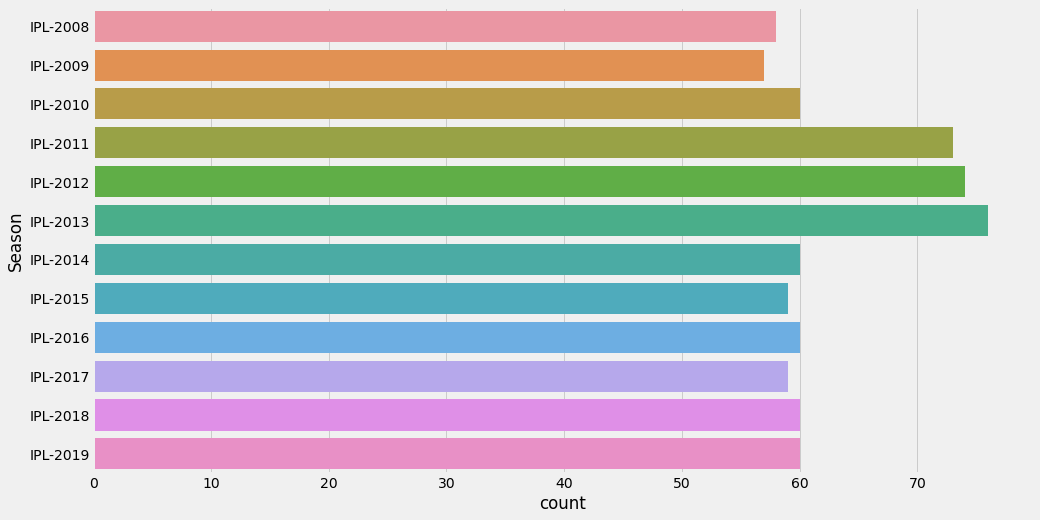

In [27]:
# Lets check the number of IPL Seasons :

plt.figure(figsize = (15,8))
sns.countplot(y = df['Season'].sort_values(),data = df)
plt.show()

And you can see that IPL-2013 had the maximum number of matches.
Then IPL-2012 and IPL-2011.
All other seasons have an almost equal number of matches.

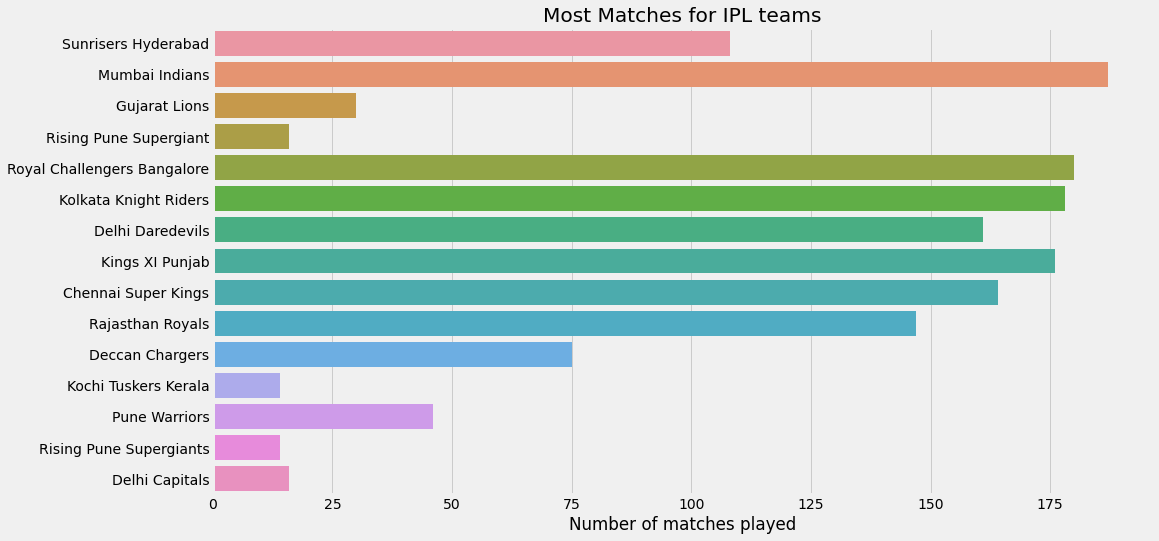

In [28]:
# Let's check the teams :

plt.figure(figsize = (15,8))
team = df['team1'].append(df['team2'])
sns.countplot( y = team, data = df)
plt.title('Most Matches for IPL teams')
plt.xlabel('Number of matches played')
plt.show()

Mumbai Indians – They have played the maximum number of matches in all IPL seasons.
Even Mumbai Indians is the team who has won the IPL trophy four times.

**Realizing the Locations for all the IPL Seasons :**

In [29]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


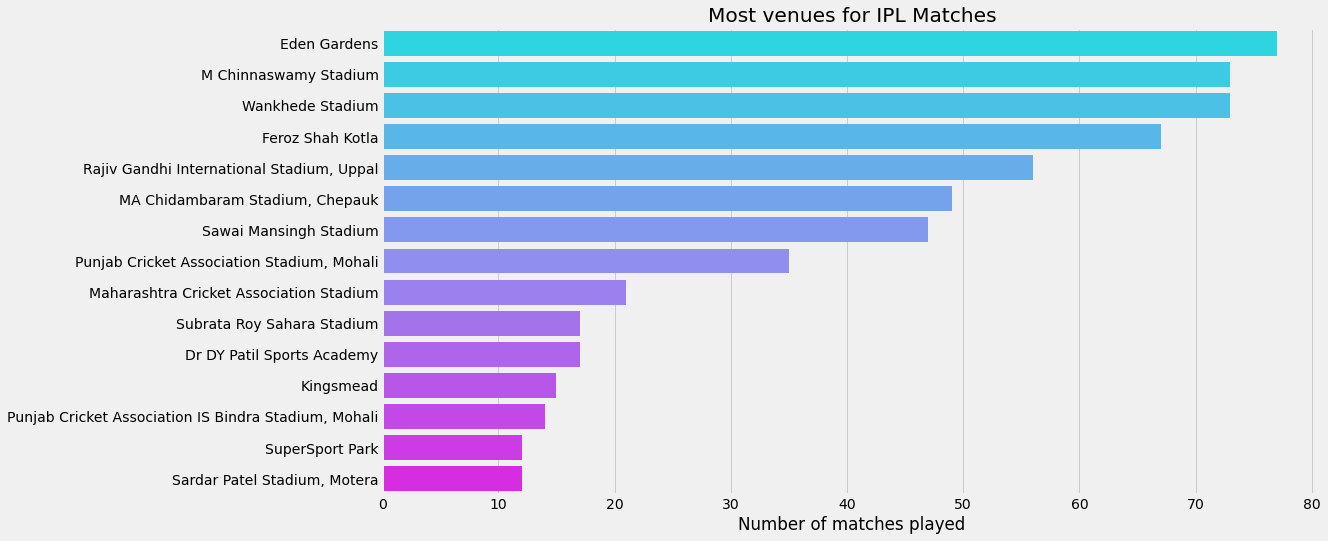

In [30]:
# Let's check the venues :

plt.figure(figsize = (15,8))
sns.barplot(y = df['venue'].value_counts().head(15).index,
            x = df['venue'].value_counts().head(15).values,
            palette = 'cool')
plt.title('Most venues for IPL Matches')
plt.xlabel('Number of matches played')
plt.show()

Eden Gardens is in the top position. Maximum number of IPL matches have been played here. Second, M chinnaswamy stadium.
Third, Wankhede stadium.

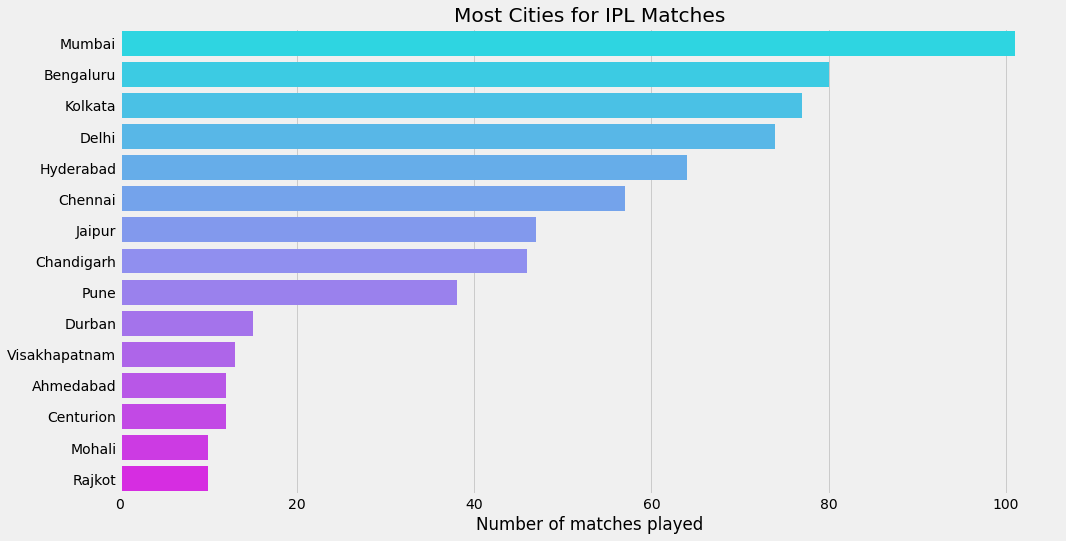

In [31]:
# Let's check the cities :

plt.figure(figsize = (15,8))
sns.barplot(y = df['city'].value_counts().head(15).index,
            x = df['city'].value_counts().head(15).values,
            palette = 'cool')
plt.title('Most Cities for IPL Matches')
plt.xlabel('Number of matches played')
plt.show()

Mumbai stands in the top position, followed by Bengaluru and Kolkata.

**Comparing Toss Winners and Winners :**

In [32]:
toss_winner_match_winner = df[df['toss_winner'] == df['winner']].reset_index()
toss_winner_match_winner

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
1,2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
2,3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
3,4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
4,5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
389,751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
390,753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
391,754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [33]:
toss_winner_match_winner['toss_winner'].value_counts()

Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Rajasthan Royals               42
Royal Challengers Bangalore    41
Kings XI Punjab                35
Delhi Daredevils               35
Sunrisers Hyderabad            23
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                  7
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: toss_winner, dtype: int64

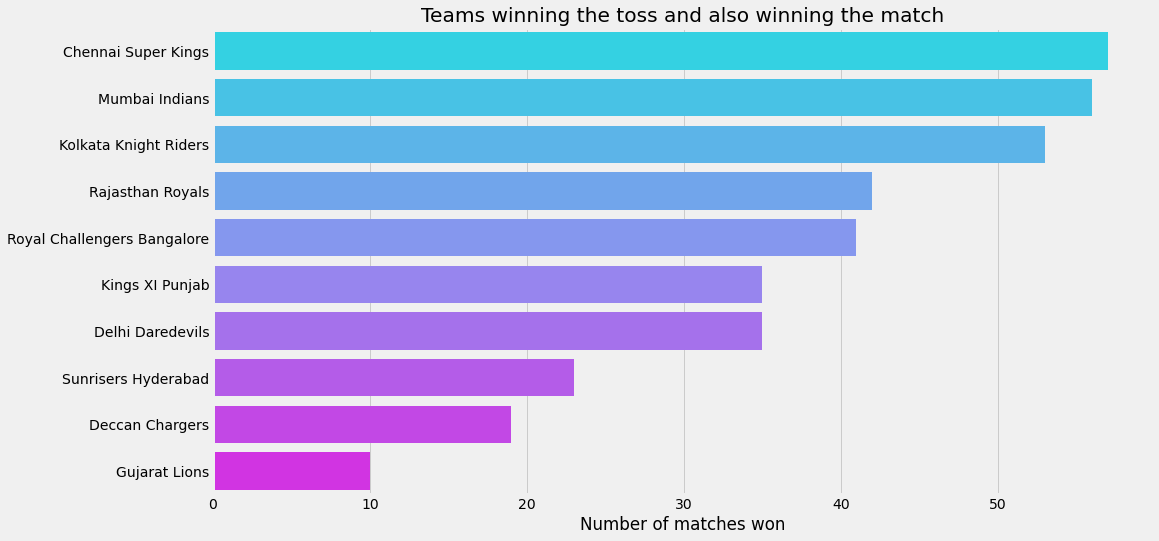

In [34]:
# Let's check the teams winning the toss and also winning the match :

plt.figure(figsize = (15,8))
sns.barplot(y = toss_winner_match_winner['toss_winner'].value_counts().head(10).index,
            x = toss_winner_match_winner['toss_winner'].value_counts().head(10).values,
            palette = 'cool')
plt.title('Teams winning the toss and also winning the match')
plt.xlabel('Number of matches won')
plt.show()

CSK stands first in winning the toss and also winning the matches.Then, Mumbai Indians and after that Kolkata Knight Riders.

**Checking the Winning Locations for all the Teams :**

In [35]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [36]:
most_wins = df.groupby(['winner'])['city'].value_counts()
pd.set_option('display.max_rows',None)
most_wins

winner                       city          
Chennai Super Kings          Chennai           40
                             Mumbai            11
                             Delhi              6
                             Pune               6
                             Bengaluru          5
                             Kolkata            5
                             Chandigarh         3
                             Hyderabad          3
                             Jaipur             3
                             Ranchi             3
                             Centurion          2
                             Port Elizabeth     2
                             Visakhapatnam      2
                             Abu Dhabi          1
                             Dharamsala         1
                             Durban             1
                             East London        1
                             Johannesburg       1
                             Kimberley          1
      



*   Mumbai Indians has won the maximum number of matches in its home town “Mumbai”.
*   Kolkata also seems to be a lucky city for Mumbai Indians.
*   After Mumbai Indians there comes Chennai Super Kings who have won 5 matches in Kolkata.
*   And after that there are very few wins for other IPL teams in Kolkata city.
*   Maximum matches won are in Chandigarh.









**Analyzing Toss Decisions in IPL Matches :**

In [37]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [38]:
# Lets check the toss decisions :

df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

1. 463 times the toss winners have chosen to field first.
2. 293 times the toss winners have chosen to bat first.
   
That means the toss decision has some association with the result of the match.

In [39]:
# Checking the Toss decion of all the matches :

field = df[df['toss_decision'] == 'field']
bat = df[df['toss_decision'] == 'bat']
print('Percentage of matches where toss decision is field :',round(field.shape[0]/df.shape[0],2)*100)
print('Percentage of matches where toss decision is bat :',round(bat.shape[0]/df.shape[0],2)*100)

Percentage of matches where toss decision is field : 61.0
Percentage of matches where toss decision is bat : 39.0


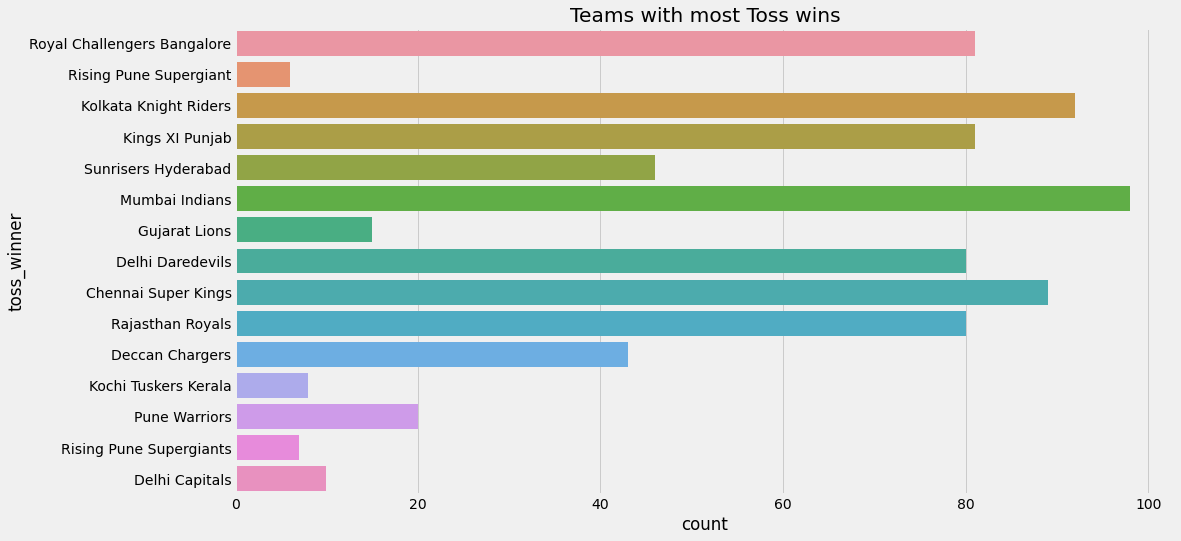

In [40]:
# Let's check the teams with most toss wins :

plt.figure(figsize = (15,8))
sns.countplot( y = df['toss_winner'], data = df)
plt.title('Teams with most Toss wins')
plt.show()

1. Mumbai Indians is the one who has won the toss maximum number of times.
2. Kolkata Knight Riders are in second place.
3. Chennai Super Kings is in third place.
4. Delhi Daredevils and Rajasthan Royals have won the toss an equal number of times.

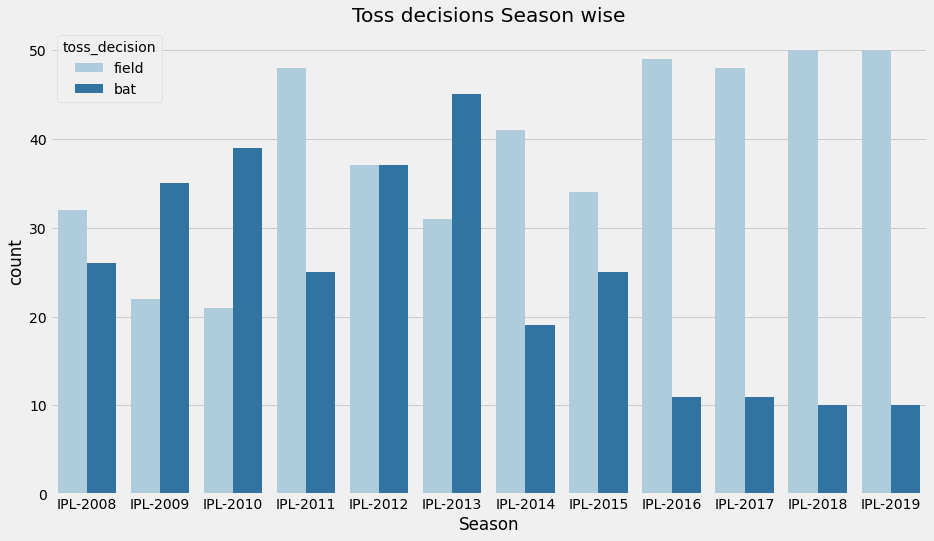

In [41]:
# Lets compare the Toss decisions Season wise :

plt.figure(figsize = (14,8))
sns.countplot( x = df['Season'].sort_values(), data = df,hue = df['toss_decision'],palette = 'Paired')
plt.title('Toss decisions Season wise')
plt.show()

**Observing the toss decision over different IPL seasons**
1. It can observed that after IPL 2014, teams started to field first.
2. In IPL-2016, 2017, 2018 and 2019 there is a huge fall.

That means teams were rarely choosing to bat first.

**DL in IPL Matches :**

In [42]:
# Let's check the Percentage of Matches where DL is applied :

dl_applied = df[df['dl_applied'] == 1].reset_index()
dl_notapplied = df[df['dl_applied'] == 0].reset_index()

print('Percentage of Matches in which DL is applied :',round(dl_applied.shape[0]/df.shape[0],2)*100)
print('Percentage of Matches in which DL is applied :',round(dl_notapplied.shape[0]/df.shape[0],2)*100)

Percentage of Matches in which DL is applied : 3.0
Percentage of Matches in which DL is applied : 97.0


In [43]:
# Lets check the winner of the matches where DL was applied :

dl_applied['winner'].value_counts()

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Kings XI Punjab                2
Chennai Super Kings            2
Delhi Daredevils               2
Sunrisers Hyderabad            2
Rising Pune Supergiants        2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

**Key insights from the Project :**

1. Unique number of teams playing in the IPL.
2. Cities where IPL matches have been played.
3. Best players of the IPL.
4. Performance of the team they were playing for.
5. Biggest matches of the IPL.
6. Teams won by the maximum number of runs.
7. Maximum number of wickets.
8. Locations of the matches.
9. Teams won the maximum number of matches in their home city.
10. Also observed that the toss decisions have some effect with the match winning.
11. And at last learned about DL.